In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [ ]:
sales=pd.read_csv('/content/supermarket_sales.csv')
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df=pd.DataFrame({'Branch':sales['Branch'],'Gender':sales['Gender'],'Product':sales['Product line'],'Total':sales['Total'],'Payment':sales['Payment'],})
df['Customer type']=sales['Customer type']
df

,Branch,Gender,Product,Total,Payment,Customer type
0,A,Female,Health and beauty,548.9715,Ewallet,Member
1,C,Female,Electronic accessories,80.2200,Cash,Normal
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal
3,A,Male,Health and beauty,489.0480,Ewallet,Member
4,A,Male,Sports and travel,634.3785,Ewallet,Normal
...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal
997,A,Male,Food and beverages,33.4320,Cash,Member
998,A,Male,Home and lifestyle,69.1110,Cash,Normal


# Hypotheisis



## H0: Members and Normal Cutomers Avg total are same.

##H1: Normal Customers average total is less than members.


In [ ]:
df.groupby('Customer type').mean()

,Total
Customer type,
Member,327.791305
Normal,318.122856


In [ ]:
means=df.groupby('Customer type').mean()

In [ ]:
difference=means['Total'][0]-means['Total'][1]
observed_difference=difference

Generating Random permutations

In [ ]:
df.iloc[123]

Branch                            C
Gender                         Male
Product          Home and lifestyle
Total                       536.844
Payment                 Credit card
Customer type                Member
Name: 123, dtype: object

In [ ]:
randomsamples=df.sample(1000,replace=False)
randomsamples

,Branch,Gender,Product,Total,Payment,Customer type
423,B,Male,Fashion accessories,213.5280,Credit card,Member
352,B,Female,Fashion accessories,402.2655,Credit card,Member
264,B,Male,Sports and travel,57.1725,Ewallet,Normal
648,C,Female,Sports and travel,32.5290,Cash,Member
177,C,Female,Fashion accessories,165.4485,Credit card,Normal
...,...,...,...,...,...,...
48,B,Male,Electronic accessories,119.2590,Credit card,Member
641,C,Female,Electronic accessories,743.8200,Ewallet,Member
862,B,Female,Home and lifestyle,106.5960,Credit card,Normal
860,C,Female,Home and lifestyle,90.5835,Ewallet,Member


In [ ]:
randomsamples['Total']

423    213.5280
352    402.2655
264     57.1725
648     32.5290
177    165.4485
         ...   
48     119.2590
641    743.8200
862    106.5960
860     90.5835
385     79.6110
Name: Total, Length: 1000, dtype: float64

In [ ]:
original_shuffled=df.copy()
original_shuffled

,Branch,Gender,Product,Total,Payment,Customer type
0,A,Female,Health and beauty,548.9715,Ewallet,Member
1,C,Female,Electronic accessories,80.2200,Cash,Normal
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal
3,A,Male,Health and beauty,489.0480,Ewallet,Member
4,A,Male,Sports and travel,634.3785,Ewallet,Normal
...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal
997,A,Male,Food and beverages,33.4320,Cash,Member
998,A,Male,Home and lifestyle,69.1110,Cash,Normal


In [ ]:
original_shuffled['shuffled']=randomsamples['Total'].values
original_shuffled

,Branch,Gender,Product,Total,Payment,Customer type,shuffled
0,A,Female,Health and beauty,548.9715,Ewallet,Member,213.5280
1,C,Female,Electronic accessories,80.2200,Cash,Normal,402.2655
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal,57.1725
3,A,Male,Health and beauty,489.0480,Ewallet,Member,32.5290
4,A,Male,Sports and travel,634.3785,Ewallet,Normal,165.4485
...,...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal,119.2590
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal,743.8200
997,A,Male,Food and beverages,33.4320,Cash,Member,106.5960
998,A,Male,Home and lifestyle,69.1110,Cash,Normal,90.5835


In [ ]:
original_shuffled.columns

Index(['Branch', 'Gender', 'Product', 'Total', 'Payment', 'Customer type',
       'shuffled'],
      dtype='object')

In [ ]:
original_shuffled.drop(['Branch', 'Gender', 'Product','Payment'], axis=1,inplace=True)

In [ ]:
original_shuffled

,Total,Customer type,shuffled
0,548.9715,Member,213.5280
1,80.2200,Normal,402.2655
2,340.5255,Normal,57.1725
3,489.0480,Member,32.5290
4,634.3785,Normal,165.4485
...,...,...,...
995,42.3675,Normal,119.2590
996,1022.4900,Normal,743.8200
997,33.4320,Member,106.5960
998,69.1110,Normal,90.5835


In [ ]:
group_means= original_shuffled.groupby('Customer type').mean()
group_means

,Total,shuffled
Customer type,,
Member,327.791305,324.419904
Normal,318.122856,321.507770


In [ ]:
difference = group_means['shuffled'][0]- group_means['shuffled'][1]
difference

2.9121346525385547

In [ ]:
original = sales[['Customer type', 'Total']]
shuffled = original.sample(1000,replace = False)
shuffled_total = shuffled['Total']
original_shuffled = original.assign(shuffled_total=shuffled_total.values )
group_means= original_shuffled.groupby('Customer type').mean()
group_means

,Total,shuffled_total
Customer type,,
Member,327.791305,337.129201
Normal,318.122856,308.747534


Simulating multiple samples

In [ ]:
import numpy as np
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    original = sales[['Customer type', 'Total']]
    shuffled = original.sample(1000,replace = False)
    shuffled_total = shuffled['Total']
    original_shuffled = original.assign(shuffled_total=shuffled_total.values )
    group_means= original_shuffled.groupby('Customer type').mean()
    difference = group_means['shuffled_total'][0]- group_means['shuffled_total'][1]
    differences[i] = difference

In [ ]:
differences_df=pd.DataFrame(differences)
differences_df

,0
0,-10.602427
1,-8.993359
2,8.290886
3,-6.086149
4,8.180678
...,...
4995,12.497497
4996,-3.183644
4997,16.004007
4998,-21.423897


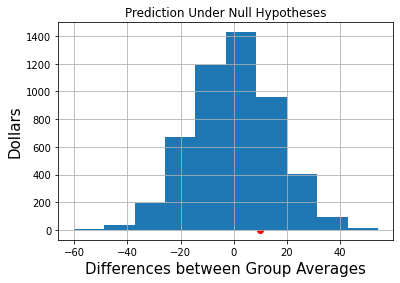

In [ ]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Dollars',fontsize=15);
plt.scatter(observed_difference,-0.005,color='red')

## The Observed diffence lies within the sample difference histogram.

In [ ]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.731

# Fail to reject the null hypotheisis.
# because emperical value is greater than p value.
